In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [13]:
# chargement du dataset de Boston Housing
boston = load_boston()
x = pd.DataFrame(boston.data,columns=boston.feature_names)
y = boston.target

In [14]:
# Diviser le dataset en ensembles d'entrainement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [15]:
# Initialiser les modèles Ridge et Lasso
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)

In [16]:
# Entrainement du modèle 
ridge_model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
# Faisons les prédictions 
ridge_predictions = ridge_model.predict(x_test)
lasso_predictions = lasso_model.predict(x_test)


In [24]:
# Évaluation des performances 
ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

ridge_r2 = r2_score(y_test, ridge_predictions)
lasso_r2 = r2_score(y_test, ridge_predictions)


print("Ridge Regression:")
print(f"MSE: {ridge_mse}, R^2:{ridge_r2}")

print("\nLasso Regression:")
print(f"MSE: {lasso_mse}, R^2:{lasso_r2}")



Ridge Regression:
MSE: 24.496357707925327, R^2:0.6659608075261687

Lasso Regression:
MSE: 24.429776880072883, R^2:0.6659608075261687


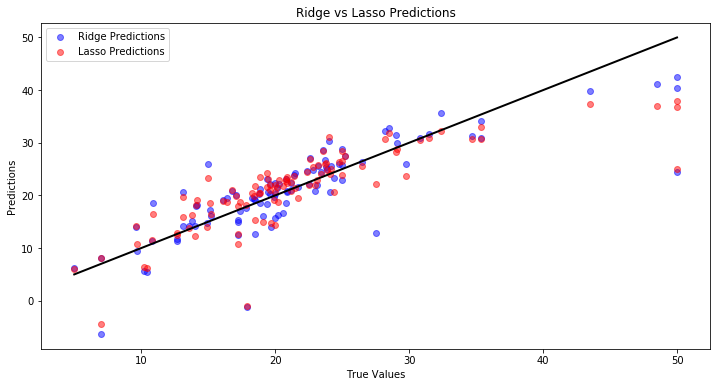

In [25]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, ridge_predictions, label="Ridge Predictions", color="blue",alpha=0.5)
plt.scatter(y_test, lasso_predictions, label="Lasso Predictions", color="red",alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="black", lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Ridge vs Lasso Predictions")
plt.legend()
plt.show()